In [77]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colorbar as cbar

In [78]:
with open('eval_results_mcts.pkl', 'rb') as f:
    eval_results = pickle.load(f)

In [79]:
len(eval_results)

200

In [80]:
binHeight = 15
binWidth = 15
numItems = 10

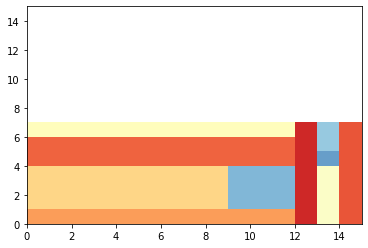

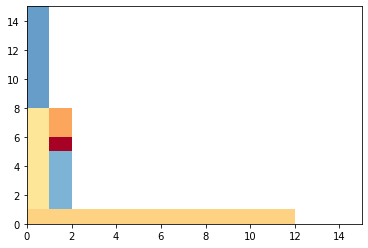

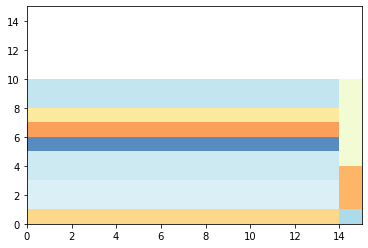

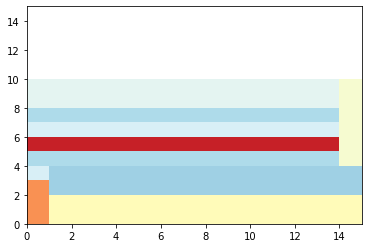

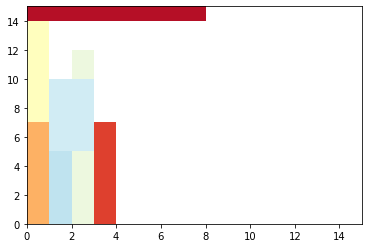

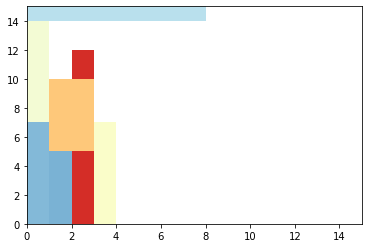

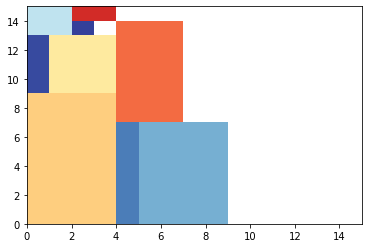

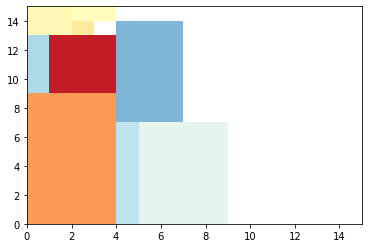

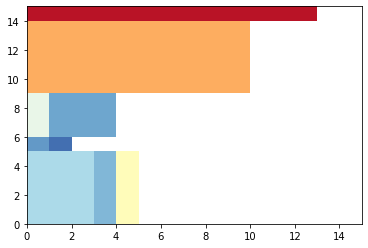

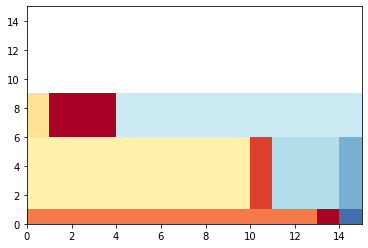

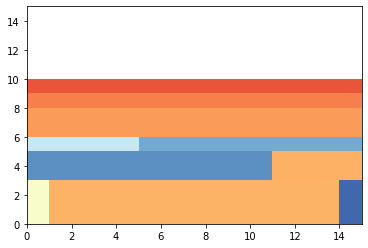

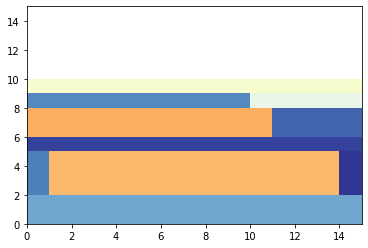

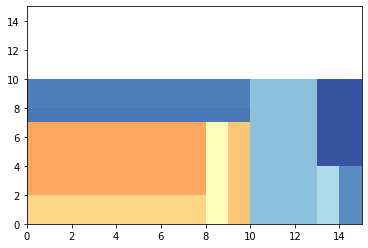

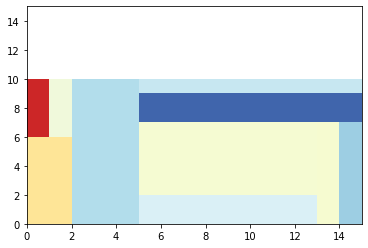

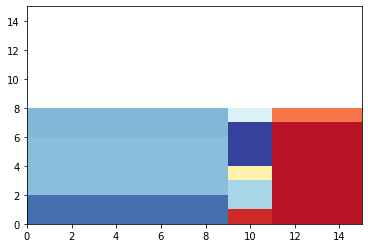

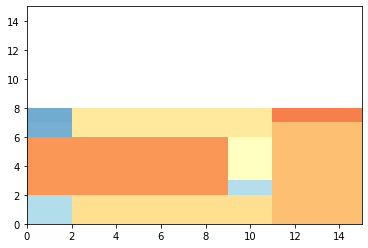

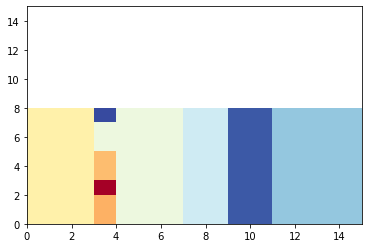

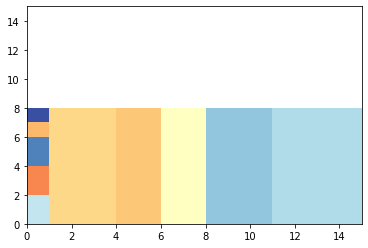

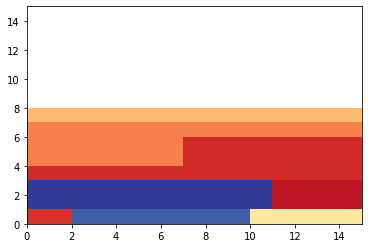

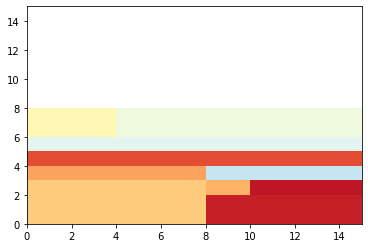

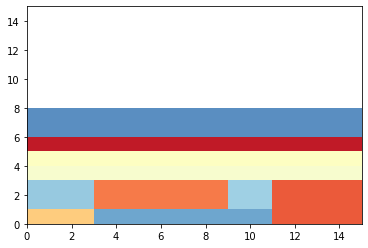

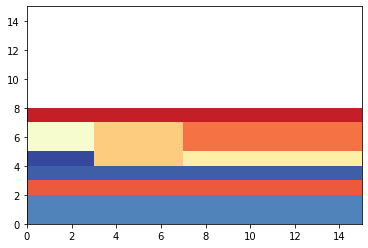

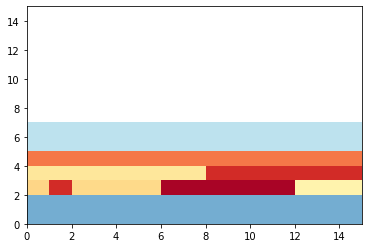

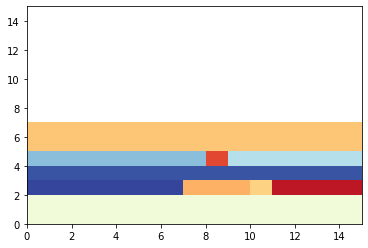

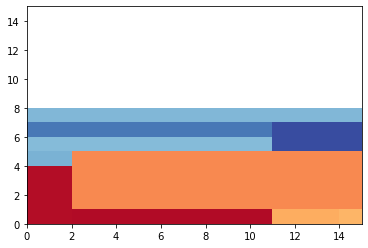

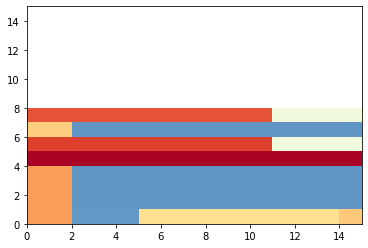

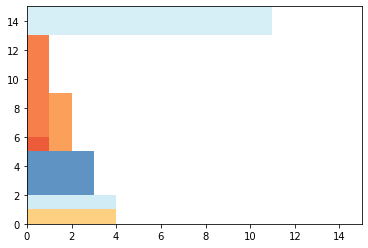

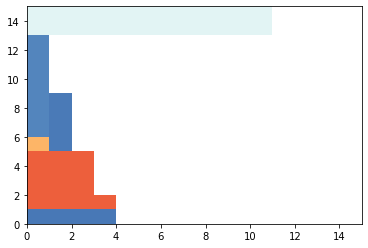

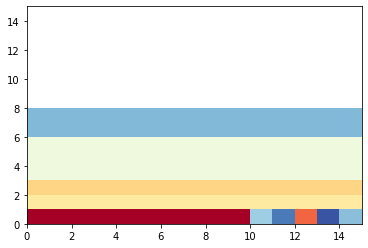

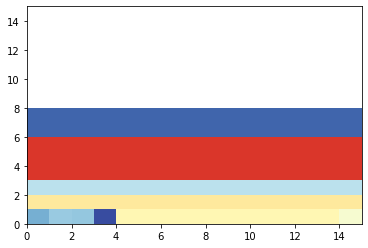

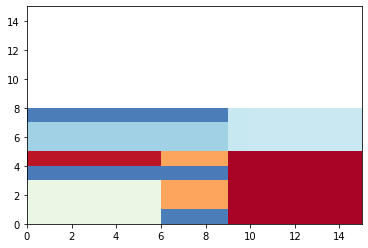

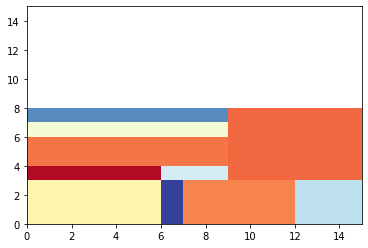

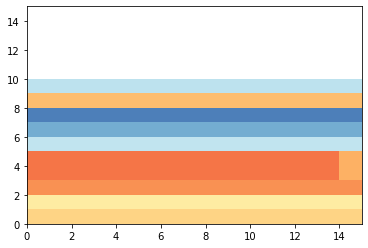

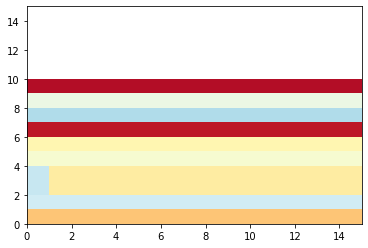

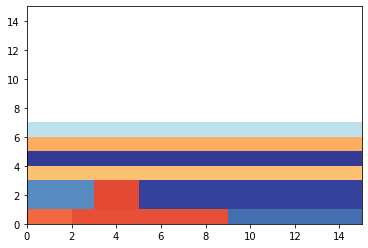

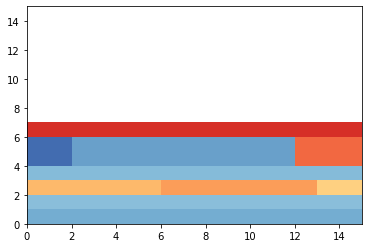

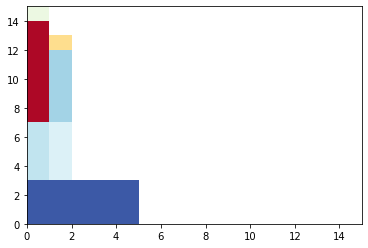

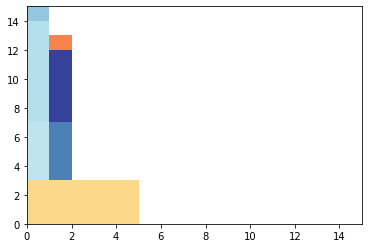

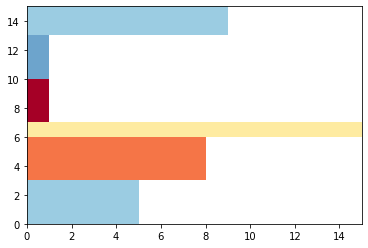

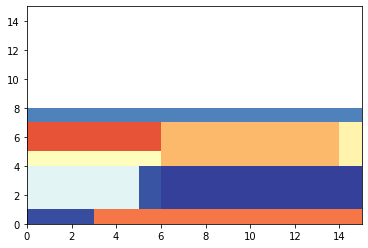

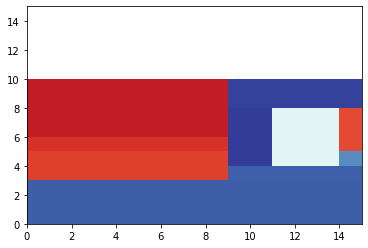

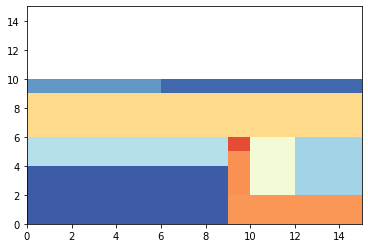

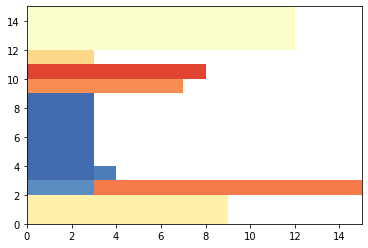

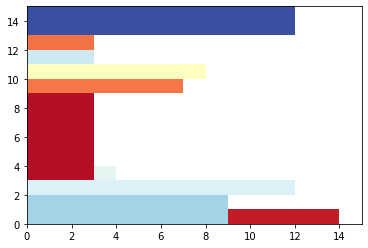

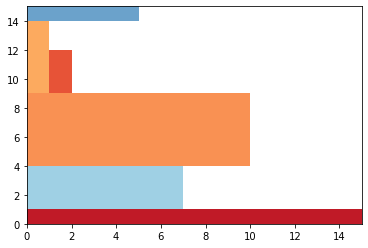

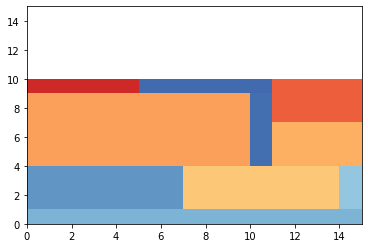

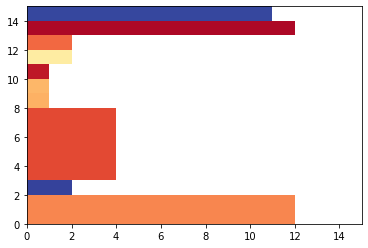

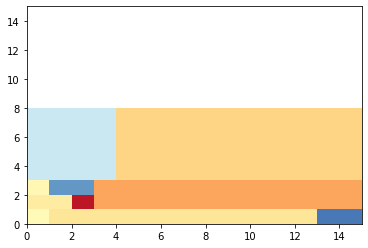

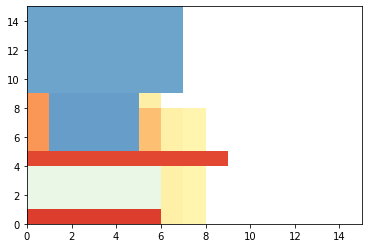

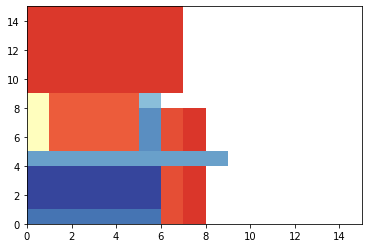

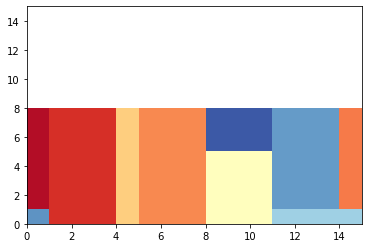

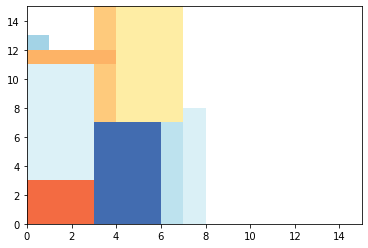

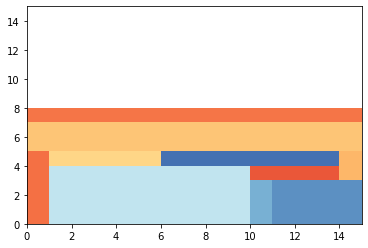

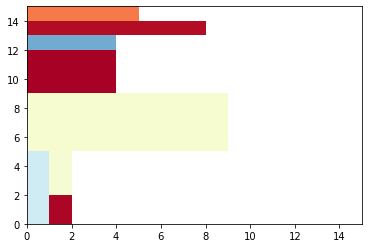

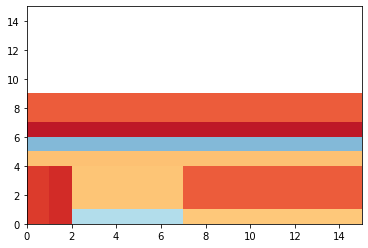

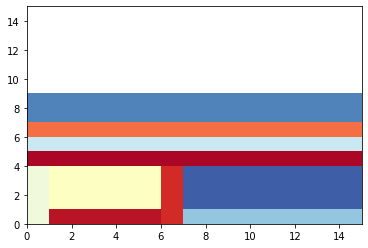

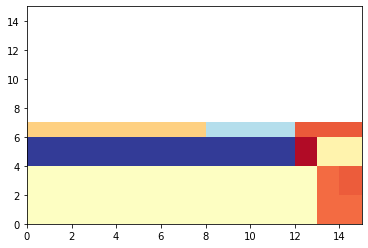

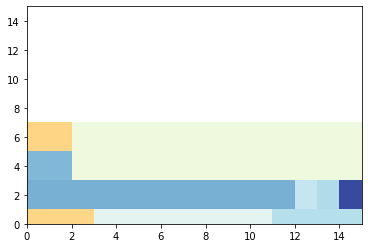

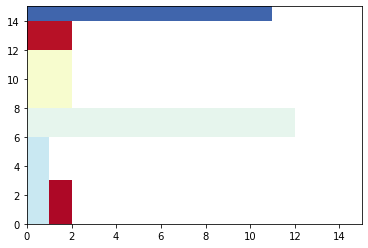

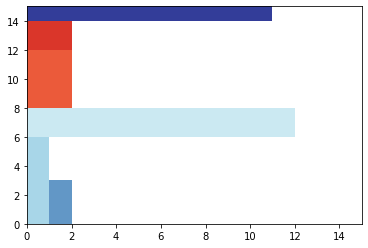

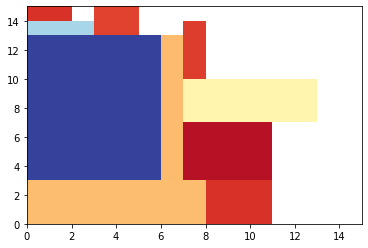

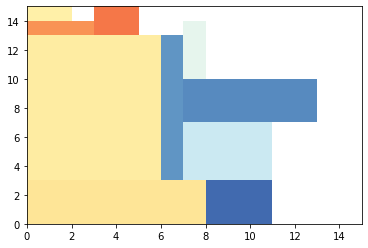

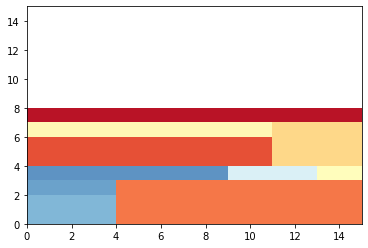

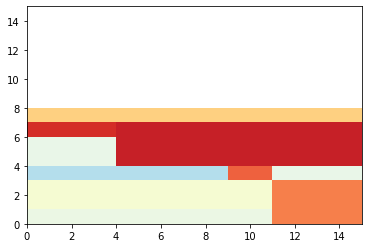

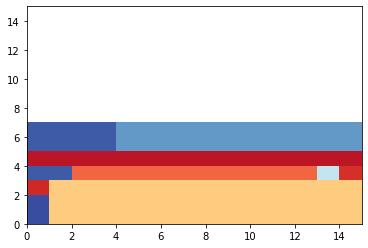

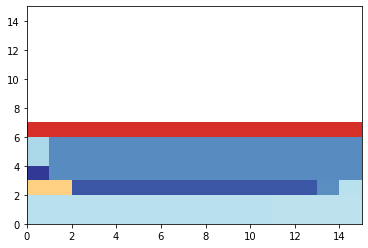

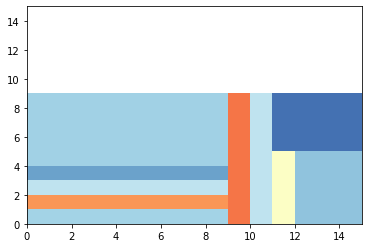

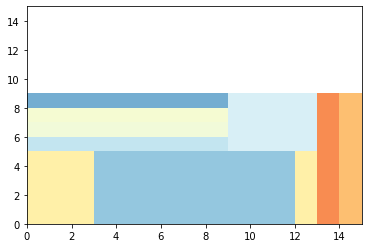

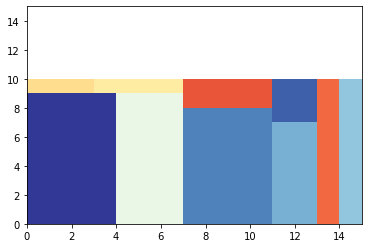

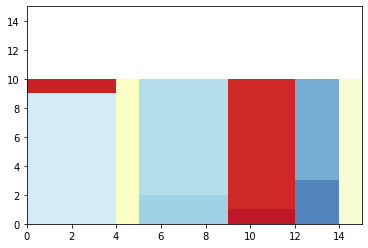

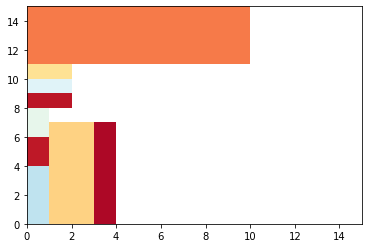

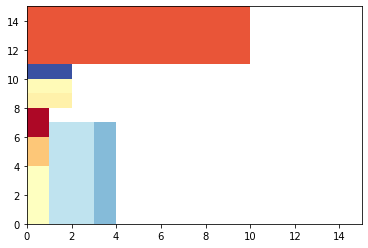

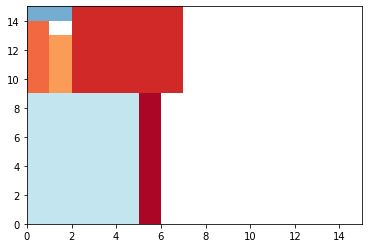

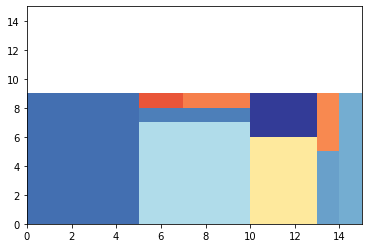

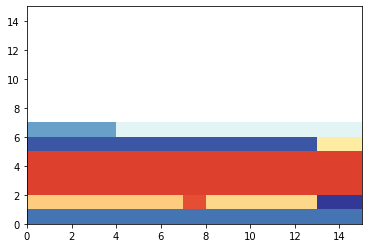

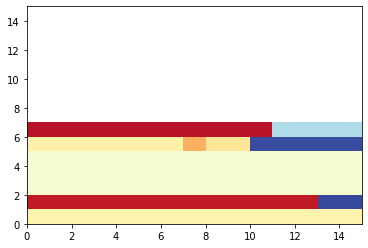

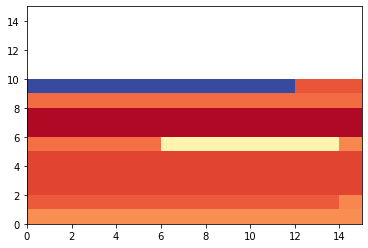

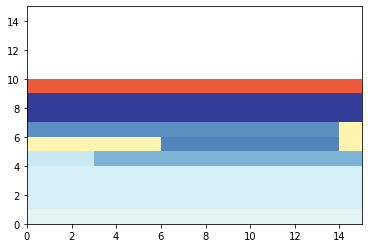

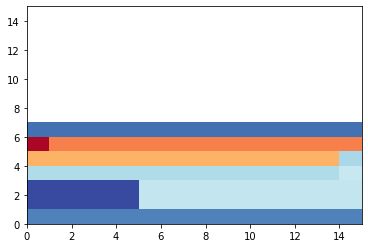

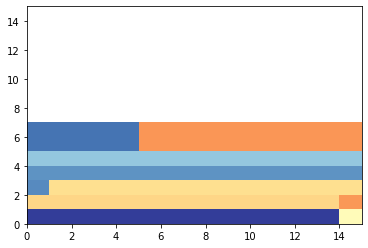

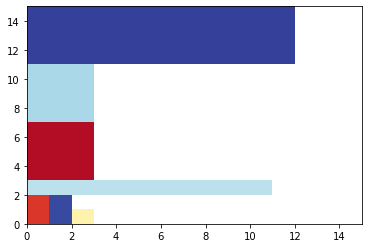

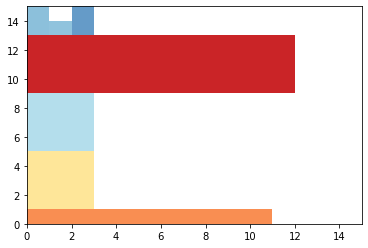

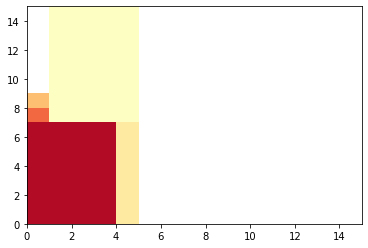

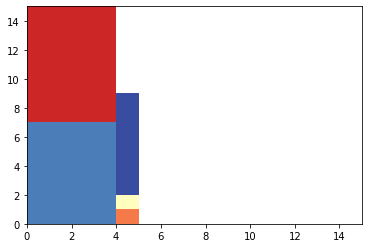

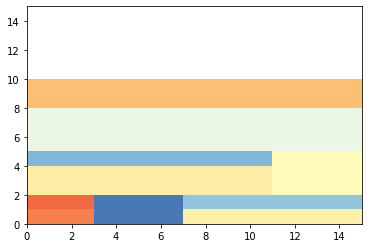

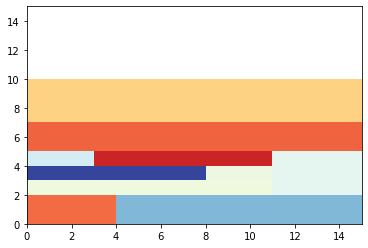

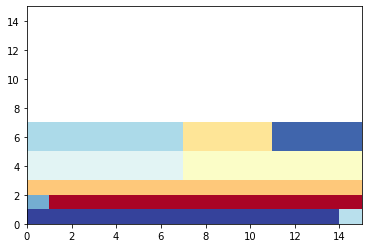

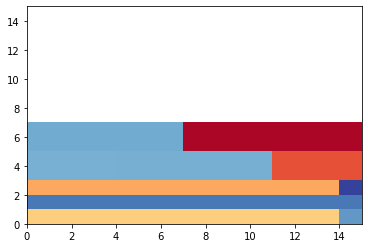

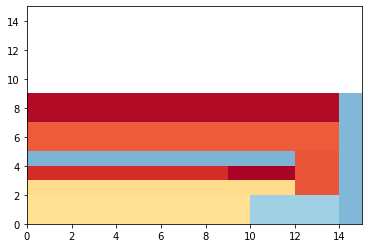

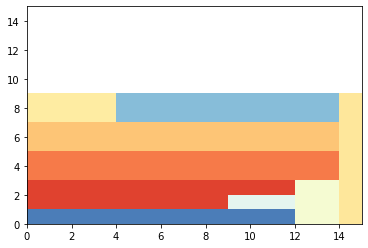

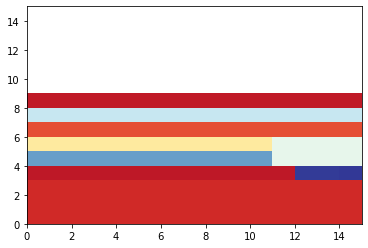

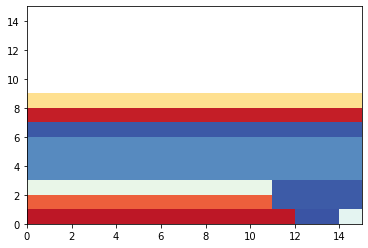

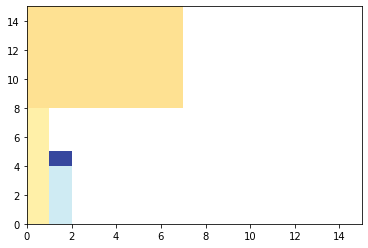

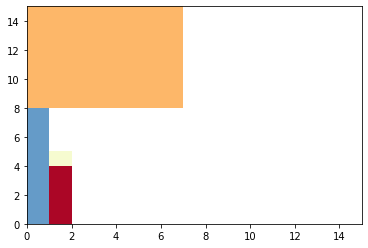

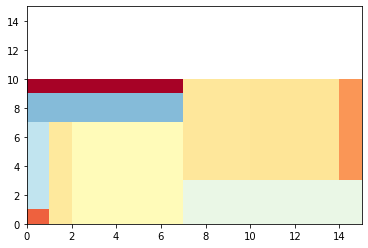

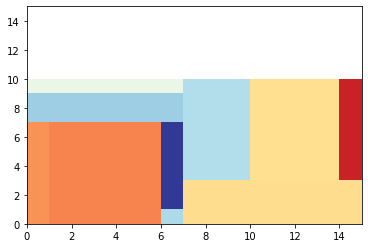

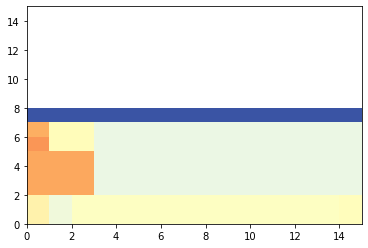

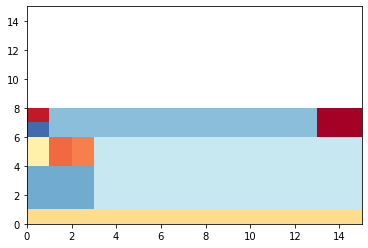

In [81]:
scores = []
# for i in range(5):
for i in range(100, len(eval_results)):
    placement_info = eval_results[i]
    scores.append(placement_info['score'])
    placement_info = placement_info['placement']
    items_list = []
    for j in range(len(placement_info)):
        (x, w, h) = placement_info[j]
        items_list.append([w, h, x])
    
    if len(items_list) != numItems:
        continue
    
    # display
    fig,ax=plt.subplots(1)
    plt.ylim(0,binHeight)
    plt.xlim(0,binWidth)
    colors=np.random.rand(numItems)
    cmap=plt.cm.RdYlBu_r
    c=cmap(colors)

    # an array for bin
    bin_game = np.zeros((15, 15))
    
    for n in range(numItems):
        [w, h, x] = items_list[n]
        # for #n item:
        h_ = 0
        for tt in range(binHeight):
            if sum(bin_game[tt, x:x+w]) == 0:
                bin_game[tt, x:x+w] = 1
                h_ += 1
                rect=patches.Rectangle((x, tt), w, 1,
                                        facecolor = c[n],
                                        )
                ax.add_patch(rect)
                if h_ == h:
                    break
    outfile = './results_pics/test_4_mcts/%s.png' % (str(i))
    plt.savefig(outfile)
    plt.show()

In [82]:
print(np.mean(scores))

0.6733333333333335


In [83]:
sum([item == max(scores) for item in scores]) / len(scores)

0.66